# Módulo 2 Análisis y Reporte sobre el desempeño del modelo. (Portafolio Análisis)

Una de mis implementaciones fue aplicar ML con numpy. Hice un repositorio que permite al usuario generar un modelo de regersión logística a partir de los datos de entrada del usuario (learning rate, iterations y valor absoluto de correlación lineal hacia la variable objetivo para ser incluida en el modelo). La entrega tuvo resta de puntos por una falsedad ya que no usé un supusto código visto en alguna clase pero bueno. Después de la retroalimentación de ambas entregas entiendo que no se busca una implementación útil y solo se busca un análisis feo así de eso trata esto.

Para la tercera entrega, me basaré en la primera implementación. Buscaré mejorar los resultados del modelo.

## Migración a sklearn

Para la primera implementación teníamos prohibido usar un framwork para el modelo pero para esta entrega no, así que esta vez usaré sklearn para mayor comodidad a la hora de experimentar y analizar el desempeño de la regresión logística.

## Deshaciendo el proyecto

Estoy totalmente arrepentido de haber puesto tanto empeño en las entregas anteriores. Para esta entrega solo me enfocaré en entregar un modelo sin utilidad pero "optimizado", por lo que eliminaré todo tipo de personalización para el usuario.

## Separación y evaluación del modelo con un conjunto de prueba y un conjunto de validación (Train/Test/Validation).

In [5]:
import pandas as pd

file_path = 'dataset/fetal_health.csv'
df = pd.read_csv(file_path)
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [10]:
# Separación train, val, test
from sklearn.model_selection import train_test_split

X = df.drop(columns=['fetal_health'])
y = df['fetal_health']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
print('Dimensiones X_train:',X_train.shape)
print('Dimensiones X_val:', X_val.shape)
print('Dimensiones X_test:', X_test.shape)

Dimensiones X_train: (1275, 21)
Dimensiones X_val: (425, 21)
Dimensiones X_test: (426, 21)


In [12]:
# Modelo
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Estandarización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, random_state=42)

log_reg.fit(X_train_scaled, y_train)

y_val_pred = log_reg.predict(X_val_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

val_report = classification_report(y_val, y_val_pred)
test_report = classification_report(y_test, y_test_pred)

In [21]:
print('Desempeño del modelo en conjunto de validación')
print(val_report)
print('\n\n')
print('Desempeño del modelo en conjunto de prueba')
print(test_report)

Desempeño del modelo en conjunto de validación
              precision    recall  f1-score   support

         1.0       0.93      0.95      0.94       331
         2.0       0.59      0.59      0.59        59
         3.0       0.96      0.74      0.84        35

    accuracy                           0.88       425
   macro avg       0.83      0.76      0.79       425
weighted avg       0.88      0.88      0.88       425




Desempeño del modelo en conjunto de prueba
              precision    recall  f1-score   support

         1.0       0.96      0.96      0.96       332
         2.0       0.69      0.73      0.71        59
         3.0       0.88      0.80      0.84        35

    accuracy                           0.91       426
   macro avg       0.84      0.83      0.83       426
weighted avg       0.91      0.91      0.91       426



**Comparación y Diagnóstico del Sesgo:**

- El modelo tiene una precisión similar en los conjuntos de entrenamiento (90%), validación (88%) y prueba (91%).
- Las métricas de las clases son consistentes entre los tres conjuntos, con ligeras diferencias, especialmente en la clase 3 (menor en validación) y la clase 2 (similar en todos los conjuntos, aunque más baja).

**Diagnóstico del sesgo:**

- Sesgo bajo: El modelo presenta un rendimiento similar en los tres conjuntos, lo que indica que está aprendiendo adecuadamente los patrones sin sobreajustarse ni subajustarse.
- El modelo parece bien ajustado y muestra un bajo sesgo, aunque se podría mejorar el rendimiento en la clase 2.

**Comparación y Diagnóstico de la Varianza:**

Para hacer el diagnóstico de la varianza, observemos los resultados:

**1.	Conjunto de entrenamiento:**
- Precisión global: 90%
- Clase 1: f1-score de 95%
- Clase 2: f1-score de 69%
- Clase 3: f1-score de 82%

**2.	Conjunto de validación:**
- Precisión global: 88%
- Clase 1: f1-score de 94%
- Clase 2: f1-score de 59%
- Clase 3: f1-score de 84%

**3.	Conjunto de prueba:**
- Precisión global: 91%
- Clase 1: f1-score de 96%
- Clase 2: f1-score de 71%
- Clase 3: f1-score de 84%

**Diagnóstico de la varianza:**

- Varianza baja: El modelo tiene un rendimiento bastante similar entre el conjunto de entrenamiento y los conjuntos de validación/prueba, con diferencias menores. No hay una caída significativa en el rendimiento de validación o prueba.
- Las diferencias observadas son pequeñas, lo que indica que el modelo generaliza bien y no está sobreajustado.

**Diagnóstico del ajuste:**

- Comparación entre entrenamiento y validación/prueba:
- Las métricas (precisión, recall, f1-score) son similares en los tres conjuntos, con diferencias menores entre ellos, lo que indica que el modelo no está sobreajustado.
- Las caídas en las métricas entre los conjuntos de entrenamiento y validación/prueba son pequeñas, lo que sugiere que el modelo no está subajustado tampoco.

**Conclusión:**

- El modelo está bien ajustado (Fit). Presenta un buen balance entre el rendimiento en el conjunto de entrenamiento y la capacidad de generalizar a nuevos datos en los conjuntos de validación y prueba.

## Plan de mejora
- Implementar una búsqueda en cuadrícula (GridSearchCV) para probar diferentes valores de C y diferentes tipos de penalización.
- Evaluar el rendimiento con validación cruzada, lo que dará una estimación más confiable del rendimiento del modelo.


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Crear pipeline con estandarización y modelo de regresión logística
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter=1000, random_state=42))
])

# Definir el grid de hiperparámetros
param_grid = {
    'log_reg__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Valores para el parámetro de regularización
    'log_reg__penalty': ['l2','l1'],  # Regularización L2 (Ridge)
    'log_reg__solver': ['liblinear', 'lbfgs']  # Solucionador para L2
}

# Crear la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

grid_search.fit(X_train, y_train)
y_val_pred = grid_search.predict(X_val)
y_test_pred = grid_search.predict(X_test)


best_params = grid_search.best_params_
print(f"Mejores parámetros: {best_params}")

# Evaluar el modelo con el conjunto de validación y prueba
val_report = classification_report(y_val, y_val_pred)
test_report = classification_report(y_test, y_test_pred)

print(f"Reporte Validación:\n{val_report}")
print(f"Reporte Prueba:\n{test_report}")

/Users/ajelandro/anaconda3/envs/alex/lib/python3.10/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ajelandro/anaconda3/envs/alex/lib/python3.10/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ajelandro/anaconda3/envs/alex/lib/python3.10/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Mejores parámetros: {'log_reg__C': 1, 'log_reg__penalty': 'l2', 'log_reg__solver': 'lbfgs'}
Reporte Validación:
              precision    recall  f1-score   support

         1.0       0.93      0.95      0.94       331
         2.0       0.59      0.59      0.59        59
         3.0       0.96      0.74      0.84        35

    accuracy                           0.88       425
   macro avg       0.83      0.76      0.79       425
weighted avg       0.88      0.88      0.88       425

Reporte Prueba:
              precision    recall  f1-score   support

         1.0       0.96      0.96      0.96       332
         2.0       0.69      0.73      0.71        59
         3.0       0.88      0.80      0.84        35

    accuracy                           0.91       426
   macro avg       0.84      0.83      0.83       426
weighted avg       0.91      0.91      0.91       426



/Users/ajelandro/anaconda3/envs/alex/lib/python3.10/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ajelandro/anaconda3/envs/alex/lib/python3.10/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ajelandro/anaconda3/envs/alex/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ajelandro/anaconda3/envs/alex/lib/python3.10/site-p

Después del Gridsearch con cv=5 (Cross Validation), quedó un modelo con exactamente las mismas métricas. Por lo que es muy probable que la busqueda haya resultado en los mismos hiperparámetros. A continuación gráficas comparativas JAJAJAJAJA

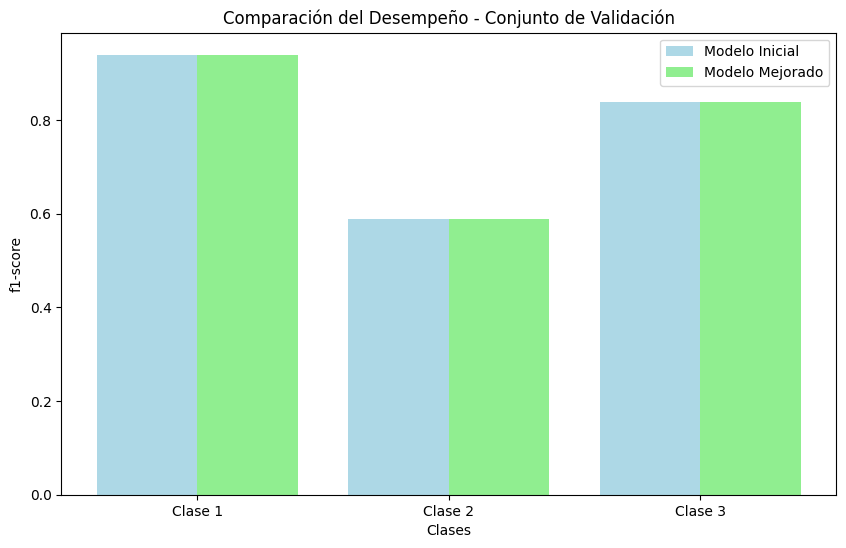

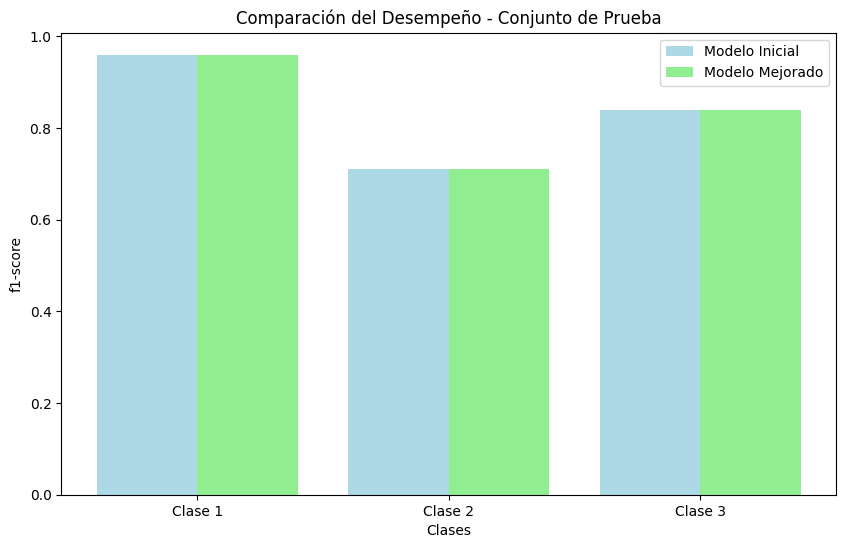

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Datos iniciales
initial_val_scores = [0.94, 0.59, 0.84]  # f1-scores for class 1, 2, 3 in validation set
initial_test_scores = [0.96, 0.71, 0.84]  # f1-scores for class 1, 2, 3 in test set

# Datos mejorados
improved_val_scores = [0.94, 0.59, 0.84]  # f1-scores for class 1, 2, 3 in validation set after grid search
improved_test_scores = [0.96, 0.71, 0.84]  # f1-scores for class 1, 2, 3 in test set after grid search

classes = ['Clase 1', 'Clase 2', 'Clase 3']

# Gráfica comparativa para el conjunto de validación
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(classes))

ax.bar(x - 0.2, initial_val_scores, 0.4, label='Modelo Inicial', color='lightblue')
ax.bar(x + 0.2, improved_val_scores, 0.4, label='Modelo Mejorado', color='lightgreen')

ax.set_xlabel('Clases')
ax.set_ylabel('f1-score')
ax.set_title('Comparación del Desempeño - Conjunto de Validación')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

plt.show()

# Gráfica comparativa para el conjunto de prueba
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - 0.2, initial_test_scores, 0.4, label='Modelo Inicial', color='lightblue')
ax.bar(x + 0.2, improved_test_scores, 0.4, label='Modelo Mejorado', color='lightgreen')

ax.set_xlabel('Clases')
ax.set_ylabel('f1-score')
ax.set_title('Comparación del Desempeño - Conjunto de Prueba')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

plt.show()